# **FINAL MACHINE LEARNING**
**Nama : Faizah Mappanyompa**

**NIM  : H071201045**


# **About Dataset**

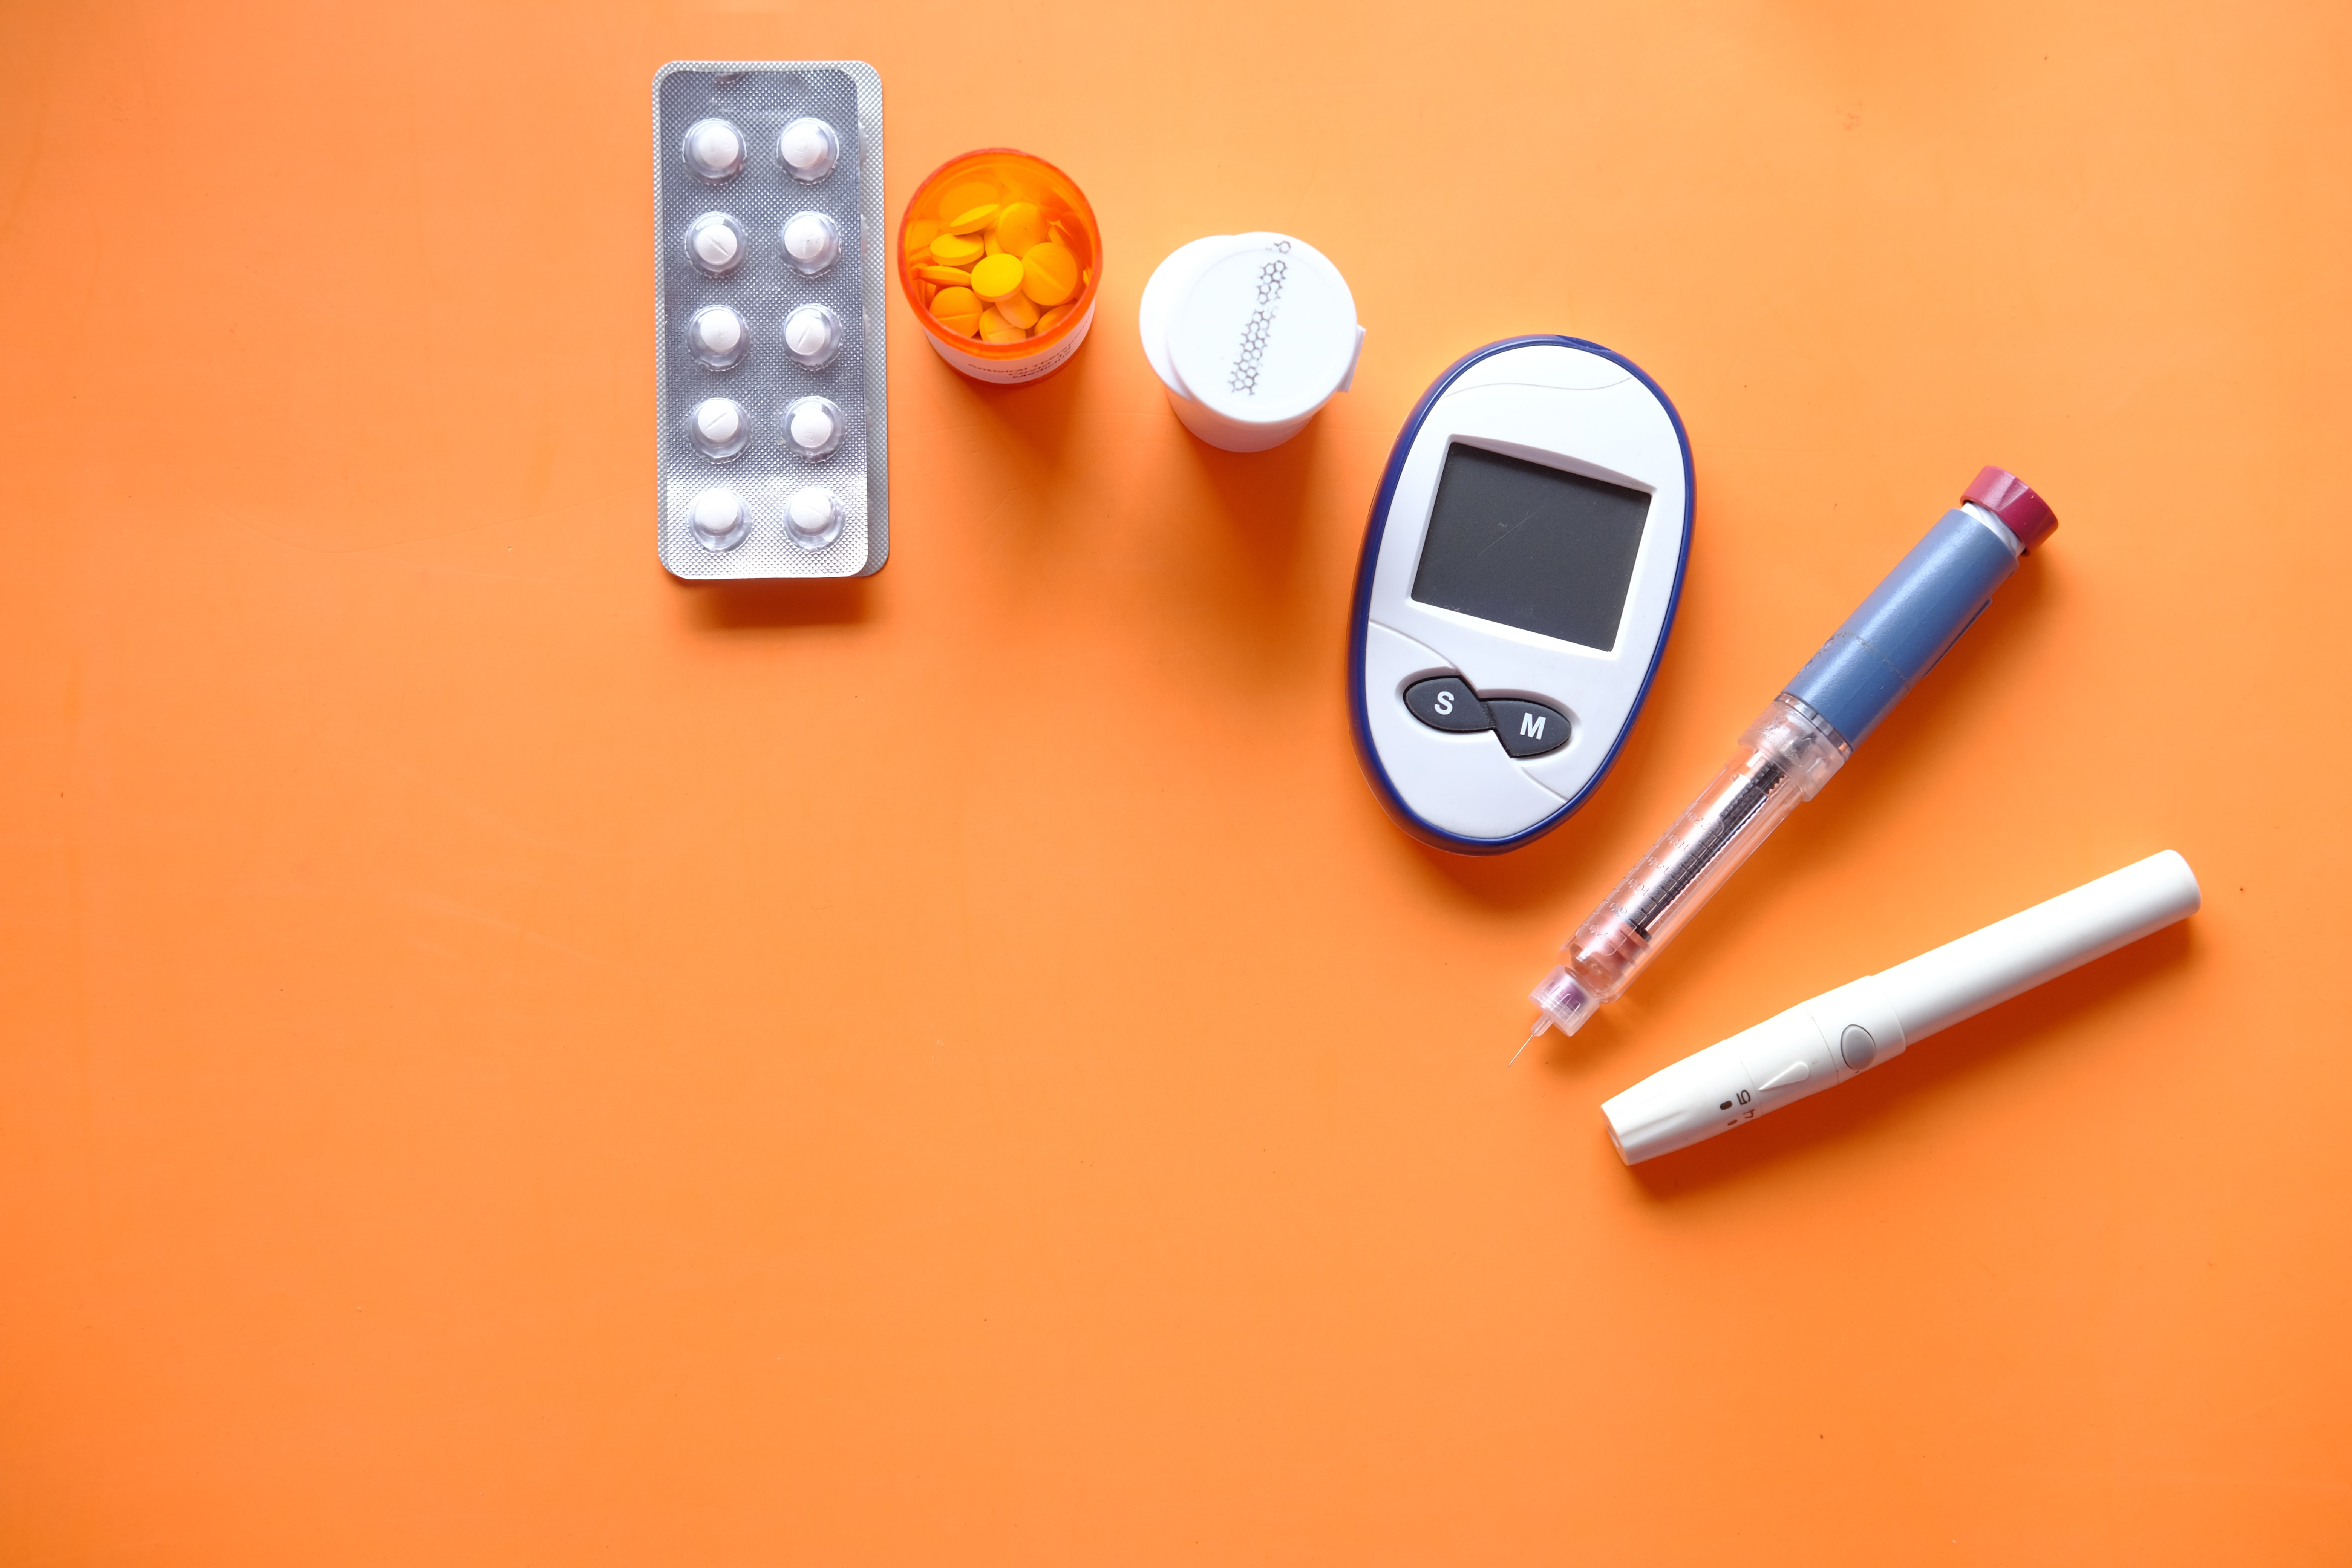

Tujuan dataset *Predict Diabetes* untuk memprediksi secara diagnostik apakah pasien mempunyai diabetes bedasarkan atribut pengukur yang diberikan.

Beberapa atribut/fitur yang akan digunakan yaitu:
1. Pregnancies: jumlah kehamilan
2. Glucose: tingkat gula dalam darah
3. BloodPressure: tekanan darah 
4. SkinThickness: ketebalan kulit
5. Insulin: tingkat insulin dalam darah
6. BMI: berat badan seseorang
7. DiabetesPedigreeFunction: presebtase diabetes
8. Age: umur seseorang

Dengan variabel target:
1. Outcome: hasil akhir apakah pasien mengalami diabetes (1=Yes) atau tidak (0=No)

# **Library**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **Read Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/FINAL/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Preparation**

## **Checking Null Values**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **Info Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Data Correlation with heatmap**

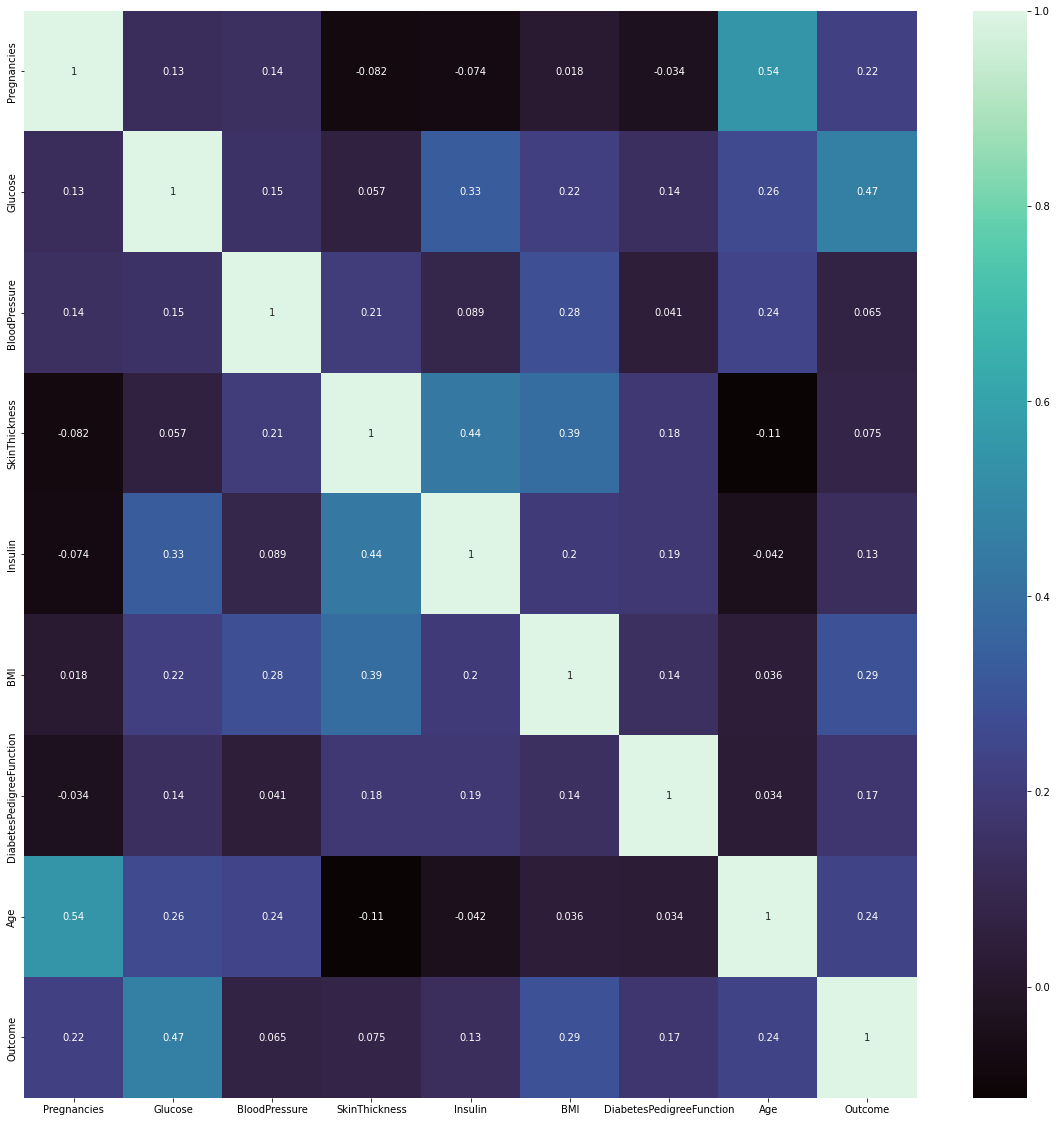

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap="mako")

# **Model Building and Model Evaluation**

In [ ]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr = lr.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = lr.predict(X_test)

accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
roc_auc_score(y_test, y_pred)

print('Model Performance using LogReg:')
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Precision Score :',precision_score(y_test, y_pred))
print('F1 Score :',f1_score(y_test, y_pred))
print('ROC Score :',roc_auc_score(y_test, y_pred))

Model Performance using LogReg:
Accuracy Score : 0.8246753246753247
Precision Score : 0.7631578947368421
F1 Score : 0.6823529411764706
ROC Score : 0.7664545635315172


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0) 
rf_model = rf_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
roc_auc_score(y_test, y_pred)

print('Model Performance using RF:')
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Precision Score :',precision_score(y_test, y_pred))
print('F1 Score :',f1_score(y_test, y_pred))
print('ROC Score :',roc_auc_score(y_test, y_pred))

Model Performance using RF:
Accuracy Score : 0.7857142857142857
Precision Score : 0.6590909090909091
F1 Score : 0.6373626373626374
ROC Score : 0.7384171803539471


## **Support Vector Machine**

In [ ]:
from sklearn import svm

svm_model = svm.SVC(random_state=0) 
svm_model = svm_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = svm_model.predict(X_test)

accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
roc_auc_score(y_test, y_pred)

print('Model Performance using SVM:')
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Precision Score :',precision_score(y_test, y_pred))
print('F1 Score :',f1_score(y_test, y_pred))
print('ROC Score :',roc_auc_score(y_test, y_pred))

Model Performance using SVM:
Accuracy Score : 0.7922077922077922
Precision Score : 0.7272727272727273
F1 Score : 0.5999999999999999
ROC Score : 0.7132630741698149


## **Final Result**

In [ ]:
def model_metrics(model, X_test, y_test, decimals = 3):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = np.round(accuracy_score(y_test, y_pred)*100,decimals)
    pre = np.round(precision_score(y_test, y_pred)*100,decimals)
    rec = np.round(recall_score(y_test, y_pred)*100,decimals)
    f1 = np.round(f1_score(y_test, y_pred)*100,decimals)
    auc = np.round(roc_auc_score(y_test, y_pred)*100,decimals)
    return {'accuracy': acc, 'precision': pre, 'recall': rec, 'f1_score': f1, 'auc': auc}

In [ ]:
table_model_result = pd.DataFrame(
    [
        model_metrics(lr, X_test, y_test),
        model_metrics(rf_model, X_test, y_test),
        model_metrics(svm_model, X_test, y_test)
    ], 
    index = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']) \
.reset_index() \
.rename(columns={'index':'Model'})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
table_model_result.sort_values(['accuracy', 'f1_score', 'auc'],
              ascending = [False, False, False])

,Model,accuracy,precision,recall,f1_score,auc
0,Logistic Regression,82.468,76.316,61.702,68.235,76.645
2,Support Vector Machine,79.221,72.727,51.064,60.000,71.326
1,Random Forest,78.571,65.909,61.702,63.736,73.842


# **Conclusion**

Dataset yang digunakan adalah dataset *'Predict Diabetes'* untuk memprediksi diabetes seorang pasien bedasarkan fitur-fitur yang diberikan dengan variabel target *'Outcome'*.

Setelah import library dan read dataset, tahap selanjutnya yaitu data preparation, dimana pada tahap ini dilakukan pengecekan pada dataset apakah ada nilai null atau tidak, data apa saja yang ada di dataset, dan pengecekan korelasi antar variabel untuk melihat seberapa terikat variabel satu sama lain. 

Untuk variabel kali ini, tidak ada perbedaan yang signifikan, dan data sudah diencoding sebelumnya (Outcome yes dan no) sehingga tidak ada variabel yang dihapus dan menggunakan semua variabel untuk pembuatan model. 

Ada beberapa model yang akan digunakan yaitu *Logistic Regression*, *Random Forest*, dan *Support Vector Machine*. Setelah dilakukan pembuatan model dan diperiksa hasil akurasi metrics (accuracy_score, presicion_score, f1_score, dan auc_score) masing-masing model, didapatkan model **Logistic Regression mendapat nilai akurasi tertinggi sebesar 82%** dan akurasi terendah oleh Random Forest sebesar 78%.


Untuk Penelitian selanjutnya dapat dilakukan exploratory data analysis lebih lanjut dan detail untuk mengetahui keterkaitan antar variabel sehingga menghasilkan hasil yang lebih akurat.